In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# uploading Data-Set 

In [2]:
df=pd.read_csv("adult.csv")

In [44]:
df.sample(2)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
30114,27,Private,189974,Some-college,Divorced,Adm-clerical,Own-child,White,Female,20,United-States,<=50K
19635,26,Private,245628,11th,Never-married,Handlers-cleaners,Unmarried,White,Male,20,United-States,<=50K


# Columns of the Data-Set

In [46]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

#  Dropping Un-necessary Columns

In [8]:
df=df.drop(['educational-num','capital-loss','capital-gain'],axis=1)

In [9]:
df.shape

(48842, 12)

# Univariate Analysis

# What is the Distribution of the age column

In [11]:
df['age'].mean()

38.64358543876172

In [13]:
df['age'].max()

90

In [14]:
df['age'].min()

17

In [16]:
df['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

<AxesSubplot:>

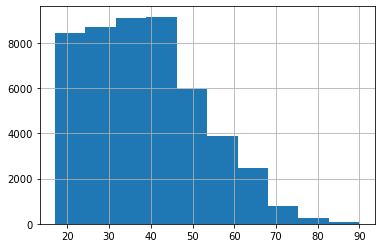

In [21]:
df['age'].histt()

# Total number of peoples between 17 to 47

In [30]:
df[(df['age']>=17) & (df['age']<=47)].count()

age               36476
workclass         36476
fnlwgt            36476
education         36476
marital-status    36476
occupation        36476
relationship      36476
race              36476
gender            36476
hours-per-week    36476
native-country    36476
income            36476
dtype: int64

In [31]:
len(df[(df['age']>=17) & (df['age']<=47)])

36476

In [33]:
sum(df['age'].between(17,47))

36476

# What is the Distribution of the workclass column

In [36]:
df['workclass'].describe()

count       48842
unique          9
top       Private
freq        33906
Name: workclass, dtype: object

<AxesSubplot:>

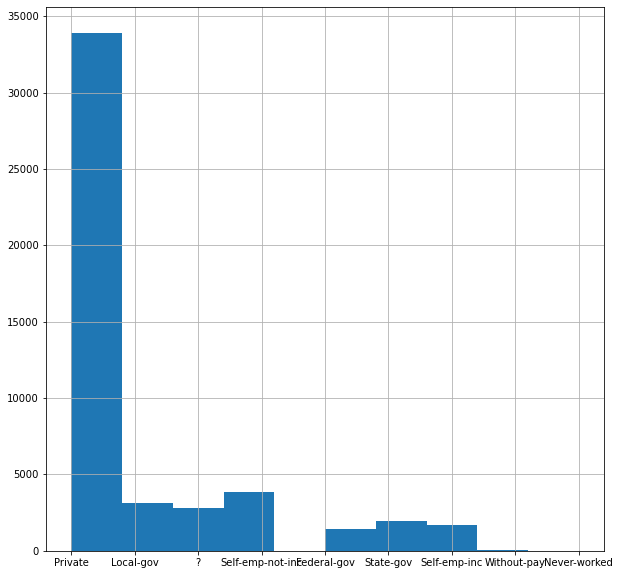

In [42]:
plt.figure(figsize=(10,10))
df['workclass'].hist()


# How many people have Master or Bachelor Degree

In [43]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [47]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [53]:
df[(df['education']=="Masters") | (df['education']=='Bachelors')]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
11,36,Federal-gov,212465,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,<=50K
15,43,Private,346189,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
20,34,Private,107914,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male,47,United-States,>50K
23,25,Private,220931,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,43,Peru,<=50K
24,25,Private,205947,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48817,34,Private,160216,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Female,55,United-States,>50K
48819,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,45,United-States,>50K
48825,31,Private,199655,Masters,Divorced,Other-service,Not-in-family,Other,Female,30,United-States,<=50K
48834,32,Private,116138,Masters,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,11,Taiwan,<=50K


In [55]:
df[(df['education']=="Masters") | (df['education']=='Bachelors')].count()

age               10682
workclass         10682
fnlwgt            10682
education         10682
marital-status    10682
occupation        10682
relationship      10682
race              10682
gender            10682
hours-per-week    10682
native-country    10682
income            10682
dtype: int64

In [56]:
len(df[(df['education']=="Masters") | (df['education']=='Bachelors')])

10682

In [58]:
sum(df['education'].isin(['Masters',"Bachelors"]))

10682

# Bivariate Analysis

In [61]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

<AxesSubplot:xlabel='income', ylabel='age'>

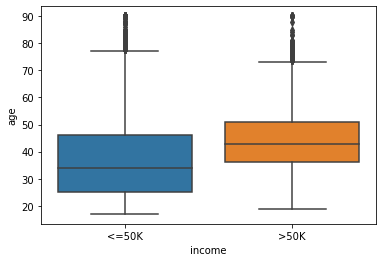

In [65]:
sns.boxplot(x='income',y='age',data=df)

# Replace Values[>=50 and <=50] with 0,1 

In [70]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

C:\Downloaded Software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='count'>

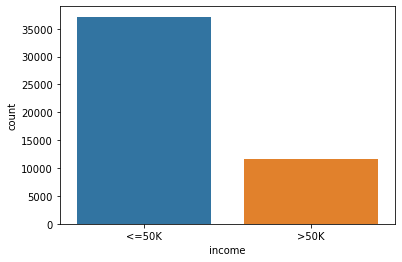

In [73]:
sns.countplot('income',data=df)

In [75]:
def func(lis):
    if lis=='>=50':
        return 0
    else:
        return 1

In [78]:
df['income']=df['income'].apply(func)
df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,1
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,1
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1
4,18,?,103497,Some-college,Never-married,?,Own-child,White,Female,30,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,1
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,1
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,1


In [98]:
df['salary']=df['income'].apply(lambda x:0 if x=='>=50' else 1)
df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,salary
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,1,1
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,1,1
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1,1
4,18,?,103497,Some-college,Never-married,?,Own-child,White,Female,30,United-States,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,1,1
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1,1
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,1,1
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,1,1


# Which work class getting the highest salary

In [95]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [96]:
df1=df.groupby("workclass")
df1.ngroups

9

In [103]:
df.groupby(['workclass','salary'])